In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("preprocessedNN.csv", header = 0)

In [3]:
df = df.dropna()

In [4]:
from sklearn.model_selection import train_test_split

feats = df.drop('shot_made_flag', axis=1)
labels = df['shot_made_flag']

feats_train, feats_test, labels_train, labels_test = train_test_split(feats, labels, random_state=1)

# Decision Tree

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=6, splitter="best")

In [22]:
model.fit(feats_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
predictions_test = model.predict(feats_test)

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_test, predictions_test)

0.6793774319066148

In [46]:
acc = []
depth = []
for i in range(1,26):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(feats_train, labels_train)

    predictions_test = model.predict(feats_test)
    acc.append(accuracy_score(labels_test, predictions_test))
    depth.append(i)


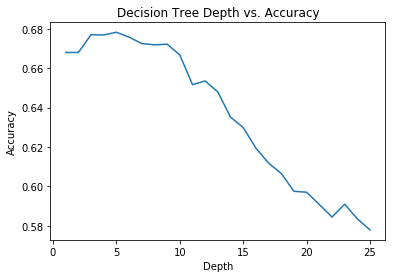

In [47]:
import matplotlib.pyplot as plt

plt.plot(depth, acc)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Depth vs. Accuracy")
plt.show()

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=8)


In [12]:
rf.fit(feats_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
predictions_test = rf.predict(feats_test)

In [14]:
accuracy_score(labels_test, predictions_test)

0.6789105058365759

In [15]:
acc = []
estimators = []
depth = []

for i in range(1,101):
    for j in range(1,6):
        model = RandomForestClassifier(n_estimators = i, max_depth=j)
        model.fit(feats_train, labels_train)

        predictions_test = model.predict(feats_test)
        acc.append(accuracy_score(labels_test, predictions_test))
        estimators.append(i)
        depth.append(j)


In [27]:
vals = list(zip(acc, estimators, depth))

In [30]:
print(max(vals))

(0.6810894941634241, 46, 5)


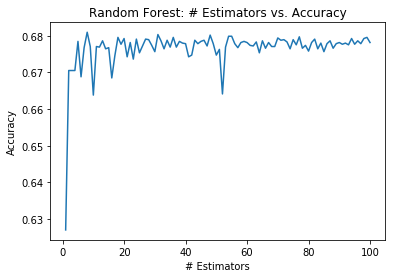

In [59]:
import matplotlib.pyplot as plt

plt.plot(estimators, acc)
plt.xlabel("# Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest: # Estimators vs. Accuracy")
plt.show()

# Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [89]:
nb.fit(feats_train, labels_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [90]:
predictions_test = nb.predict(feats_test)

In [92]:
accuracy_score(labels_test, predictions_test)

0.6224124513618677

# Multilayer Perceptron

In [121]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=10, max_iter=1000)

In [122]:
mlp.fit(feats_train, labels_train)

MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [123]:
predictions_test = mlp.predict(feats_test)

In [124]:
accuracy_score(labels_test, predictions_test)

0.5355642023346303

# Nearest Neighbors

In [18]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(20)

In [19]:
knn.fit(feats_train, labels_train)

predictions = knn.predict(feats_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_test, predictions)

0.5788326848249027

# Gradient Boosting Classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
gb = GradientBoostingClassifier(n_estimators=10, max_depth=6)

In [35]:
gb.fit(feats_train, labels_train)
predictions = gb.predict(feats_test)

In [36]:
accuracy_score(labels_test, predictions)

0.6820233463035019